<a href="https://colab.research.google.com/github/Bickmore664/newGITTest/blob/master/Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Sample - Superstore.csv')
df.head()

,Profit Ratio,Category,City,Country/Region,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Manufacturer,Product Name,Profit,Quantity,Region,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
0,16%,Furniture,Henderson,United States,Claire Gute,0%,1,11/8/2018,CA-2018-152156,42420.0,Bush,Bush Somerset Collection Bookcase,$42,2,South,$262,Consumer,11/11/2018,Second Class,Kentucky,Bookcases
1,30%,Furniture,Henderson,United States,Claire Gute,0%,1,11/8/2018,CA-2018-152156,42420.0,Hon,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",$220,3,South,$732,Consumer,11/11/2018,Second Class,Kentucky,Chairs
2,47%,Office Supplies,Los Angeles,United States,Darrin Van Huff,0%,1,6/12/2018,CA-2018-138688,90036.0,Universal,Self-Adhesive Address Labels for Typewriters b...,$7,2,West,$15,Corporate,6/16/2018,Second Class,California,Labels
3,-40%,Furniture,Fort Lauderdale,United States,Sean O'Donnell,45%,1,10/11/2017,US-2017-108966,33311.0,Bretford,Bretford CR4500 Series Slim Rectangular Table,-$383,5,South,$958,Consumer,10/18/2017,Standard Class,Florida,Tables
4,11%,Office Supplies,Fort Lauderdale,United States,Sean O'Donnell,20%,1,10/11/2017,US-2017-108966,33311.0,Eldon,Eldon Fold 'N Roll Cart System,$3,2,South,$22,Consumer,10/18/2017,Standard Class,Florida,Storage


In [ ]:
df.shape

(9994, 21)

In [ ]:
df.describe()

,Number of Records,Postal Code,Quantity
count,9994.0,9983.000000,9994.000000
mean,1.0,55245.233297,3.789574
std,0.0,32038.715955,2.225110
min,1.0,1040.000000,1.000000
25%,1.0,23223.000000,2.000000
50%,1.0,57103.000000,3.000000
75%,1.0,90008.000000,5.000000
max,1.0,99301.000000,14.000000


In [ ]:
df.dtypes

Profit Ratio          object
Category              object
City                  object
Country/Region        object
Customer Name         object
Discount              object
Number of Records      int64
Order Date            object
Order ID              object
Postal Code          float64
Manufacturer          object
Product Name          object
Profit                object
Quantity               int64
Region                object
Sales                 object
Segment               object
Ship Date             object
Ship Mode             object
State                 object
Sub-Category          object
dtype: object

In [ ]:
df.columns = df.columns.str.replace(' ','_')
df.columns = map(str.lower, df.columns)
df.head()

,profit_ratio,category,city,country/region,customer_name,discount,number_of_records,order_date,order_id,postal_code,manufacturer,product_name,profit,quantity,region,sales,segment,ship_date,ship_mode,state,sub-category
0,16%,Furniture,Henderson,United States,Claire Gute,0%,1,11/8/2018,CA-2018-152156,42420.0,Bush,Bush Somerset Collection Bookcase,$42,2,South,$262,Consumer,11/11/2018,Second Class,Kentucky,Bookcases
1,30%,Furniture,Henderson,United States,Claire Gute,0%,1,11/8/2018,CA-2018-152156,42420.0,Hon,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",$220,3,South,$732,Consumer,11/11/2018,Second Class,Kentucky,Chairs
2,47%,Office Supplies,Los Angeles,United States,Darrin Van Huff,0%,1,6/12/2018,CA-2018-138688,90036.0,Universal,Self-Adhesive Address Labels for Typewriters b...,$7,2,West,$15,Corporate,6/16/2018,Second Class,California,Labels
3,-40%,Furniture,Fort Lauderdale,United States,Sean O'Donnell,45%,1,10/11/2017,US-2017-108966,33311.0,Bretford,Bretford CR4500 Series Slim Rectangular Table,-$383,5,South,$958,Consumer,10/18/2017,Standard Class,Florida,Tables
4,11%,Office Supplies,Fort Lauderdale,United States,Sean O'Donnell,20%,1,10/11/2017,US-2017-108966,33311.0,Eldon,Eldon Fold 'N Roll Cart System,$3,2,South,$22,Consumer,10/18/2017,Standard Class,Florida,Storage


In [ ]:
import re
import string

In [ ]:
def remove_punct(text):
  text_nopunct = "".join([char for char in text if char not in string.punctuation])
  return text_nopunct

df['profit_ratio'] = df['profit_ratio'].apply(lambda x: remove_punct(x))
df['discount'] = df['discount'].apply(lambda x: remove_punct(x))
df['profit'] = df['profit'].apply(lambda x: remove_punct(x))
df['sales'] = df['sales'].apply(lambda x: remove_punct(x))
df.head()

,profit_ratio,category,city,country/region,customer_name,discount,number_of_records,order_date,order_id,postal_code,manufacturer,product_name,profit,quantity,region,sales,segment,ship_date,ship_mode,state,sub-category
0,16,Furniture,Henderson,United States,Claire Gute,0,1,11/8/2018,CA-2018-152156,42420.0,Bush,Bush Somerset Collection Bookcase,42,2,South,262,Consumer,11/11/2018,Second Class,Kentucky,Bookcases
1,30,Furniture,Henderson,United States,Claire Gute,0,1,11/8/2018,CA-2018-152156,42420.0,Hon,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",220,3,South,732,Consumer,11/11/2018,Second Class,Kentucky,Chairs
2,47,Office Supplies,Los Angeles,United States,Darrin Van Huff,0,1,6/12/2018,CA-2018-138688,90036.0,Universal,Self-Adhesive Address Labels for Typewriters b...,7,2,West,15,Corporate,6/16/2018,Second Class,California,Labels
3,40,Furniture,Fort Lauderdale,United States,Sean O'Donnell,45,1,10/11/2017,US-2017-108966,33311.0,Bretford,Bretford CR4500 Series Slim Rectangular Table,383,5,South,958,Consumer,10/18/2017,Standard Class,Florida,Tables
4,11,Office Supplies,Fort Lauderdale,United States,Sean O'Donnell,20,1,10/11/2017,US-2017-108966,33311.0,Eldon,Eldon Fold 'N Roll Cart System,3,2,South,22,Consumer,10/18/2017,Standard Class,Florida,Storage


In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'], infer_datetime_format= True)
df['ship_date'] = pd.to_datetime(df['ship_date'], infer_datetime_format= True)
df[['sales','profit']] = df[['sales','profit']].astype(float)
df.dtypes


profit_ratio                 object
category                     object
city                         object
country/region               object
customer_name                object
discount                     object
number_of_records             int64
order_date           datetime64[ns]
order_id                     object
postal_code                 float64
manufacturer                 object
product_name                 object
profit                      float64
quantity                      int64
region                       object
sales                       float64
segment                      object
ship_date            datetime64[ns]
ship_mode                    object
state                        object
sub-category                 object
dtype: object

In [ ]:
df.describe()

,number_of_records,postal_code,profit,quantity,sales
count,9994.0,9983.000000,9994.000000,9994.000000,9994.000000
mean,1.0,55245.233297,59.898239,3.789574,229.873324
std,0.0,32038.715955,228.273068,2.225110,623.248946
min,1.0,1040.000000,0.000000,1.000000,0.000000
25%,1.0,23223.000000,5.000000,2.000000,17.000000
50%,1.0,57103.000000,14.000000,3.000000,54.500000
75%,1.0,90008.000000,43.000000,5.000000,210.000000
max,1.0,99301.000000,8400.000000,14.000000,22638.000000


In [ ]:
df_pivot = df.pivot_table(index='state', values = ['sales', 'profit'], aggfunc='sum')
df_pivot.sort_values(by=['profit'], ascending=False)

,profit,sales
state,,
New York,84080.0,310914.0
California,83906.0,457731.0
Texas,47906.0,170187.0
Washington,34168.0,138656.0
Pennsylvania,27644.0,116522.0
Ohio,26538.0,78253.0
Illinois,26401.0,80162.0
Michigan,24458.0,76281.0
Virginia,18600.0,70641.0


In [ ]:
!pip install pandas_bokeh

In [ ]:
import numpy as np
import pandas as pd
import pandas_bokeh
pandas_bokeh.output_notebook()
pd.set_option('plotting.backend', 'pandas_bokeh')
from bokeh.models.widgets import DataTable, TableColumn
from bokeh.models import ColumnDataSource

In [ ]:
import math
from bokeh.plotting import figure, show
from bokeh.models import NumeralTickFormatter
df_pivot.reset_index()
df_pivot = df_pivot.sort_values(by='profit', ascending=False)
p_bar = df_pivot.plot_bokeh(kind = 'bar', x=df_pivot.index, vertical_xlabel=True, figsize=(1000, 450))
p_bar.yaxis[0].formatter = NumeralTickFormatter(format="$0")
show(p_bar)

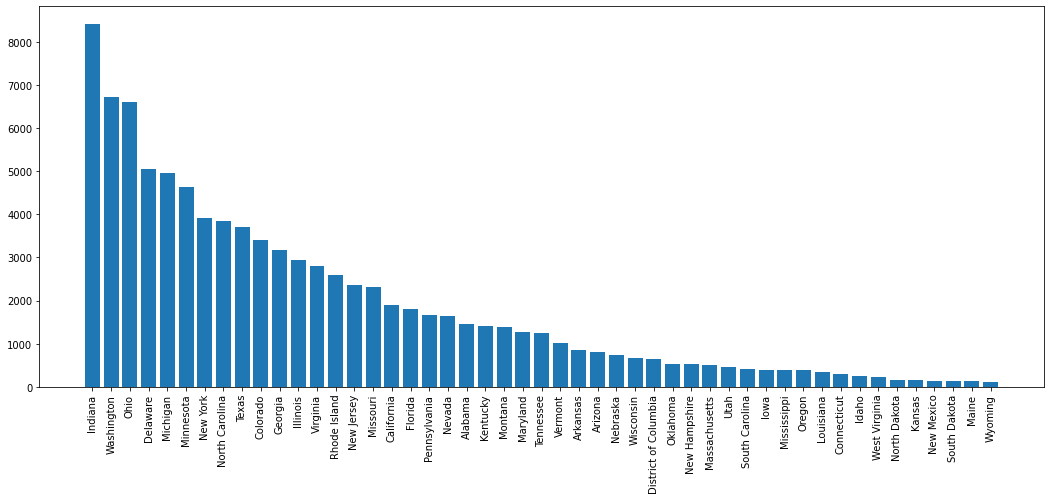

In [ ]:
import matplotlib.pyplot as plt

df_plot = df_pivot.reset_index()
df_plot = df.sort_values('profit', ascending=False)
plt.figure(figsize=(18,7))
plt.ticklabel_format()
plt.bar(df_plot['state'], df_plot['profit'])
plt.xticks(rotation = 90)
plt.show();

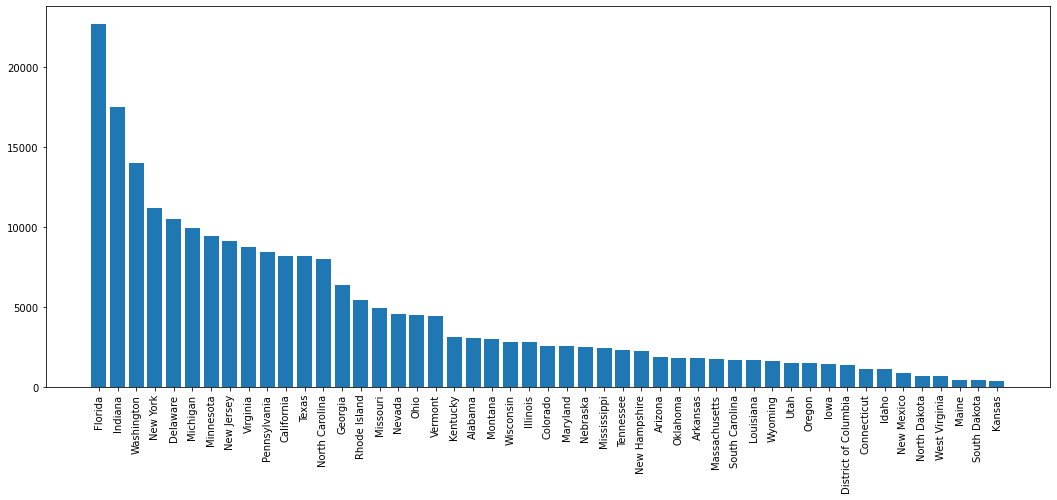

In [ ]:
import matplotlib.pyplot as plt

df_plot = df_pivot.reset_index()
df_plot = df.sort_values('sales', ascending=False)
plt.figure(figsize=(18,7))
plt.ticklabel_format()
plt.bar(df_plot['state'], df_plot['sales'])
plt.xticks(rotation = 90)
plt.show();

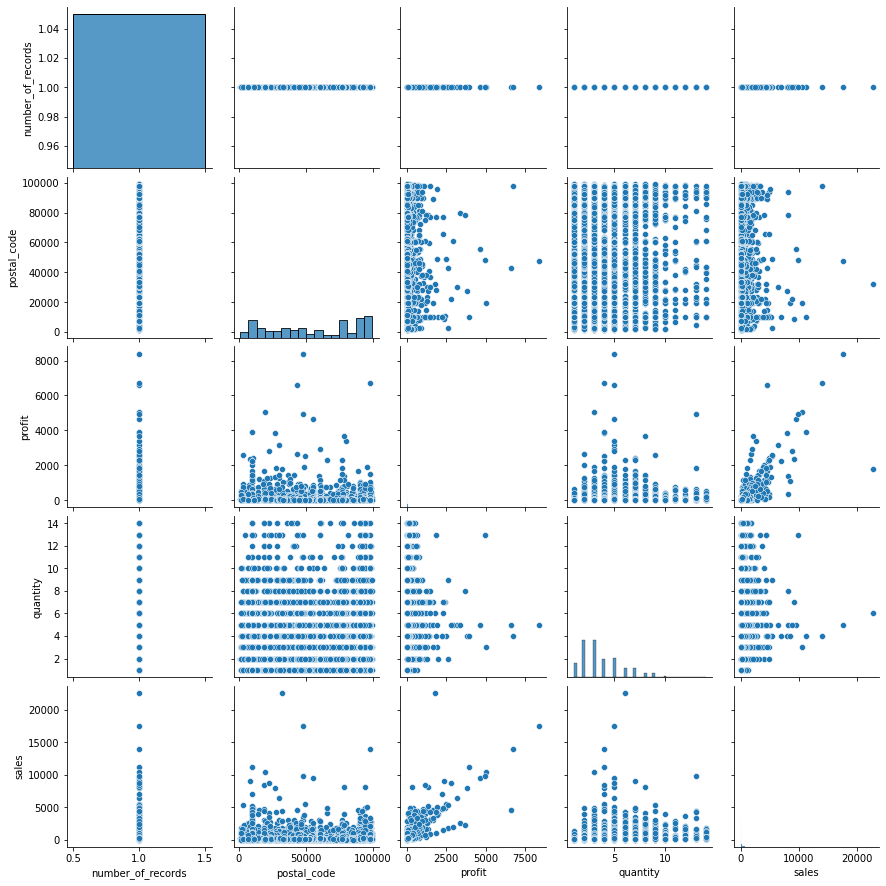

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
df_category = df.pivot_table(index=['state','category'], values = ['sales', 'profit'], aggfunc='sum')
df_category.sort_values(by=['profit'], ascending=False)

profit     sales
state                category                          
New York             Technology       42181.0  127496.0
California           Office Supplies  37752.0  142383.0
                     Technology       30116.0  159279.0
Texas                Office Supplies  27709.0   44488.0
New York             Office Supplies  25983.0   90034.0
...                                       ...       ...
South Dakota         Furniture           67.0     325.0
District of Columbia Office Supplies     60.0     139.0
Kansas               Furniture           37.0     112.0
Maine                Furniture           34.0     109.0
Montana              Furniture           22.0      64.0

[142 rows x 2 columns]

In [ ]:
#df_category = df[['state','category','profit','sales']]
p_scatter = df.plot_bokeh.scatter(x='sales',y='profit', category='category')

In [ ]:
df.plot(kind='scatter',x='profit', y='sales', title='Sales and Profit', figsize=(10,6));

In [ ]:
df[['sales','profit']].plot(kind='hist',figsize=(9,6), bins=30);

In [ ]:
df[['quantity','sales']].plot(kind='hist',figsize=(9,6), bins=30);

In [ ]:
! pip install pandas-bokeh

In [ ]:
import pandas as pd
import pandas_bokeh

In [ ]:
pandas_bokeh.output_notebook()

In [ ]:
df['postal_code'] = df['postal_code'].astype(str)
df.set_index('order_date')
df = df.loc[(df['order_date'] > '2019-01-01')]
ax = df.plot_bokeh(kind='line', xlim=(6000,10000) )
#ax.set_xlabel('order_date')

In [ ]:
df.plot_bokeh.scatter(x='profit',y='sales', category='category', title='Profit and Sales by Category');

In [ ]:
df.plot_bokeh.scatter(x='profit', y='quantity', category='category');

In [ ]:
df.set_index('category')
df[['profit','sales']].plot_bokeh(kind='bar')

Figure(id='2548', ...)

In [ ]:

state_bar = df.plot_bokeh.bar(ylabel = 'profit',
                              title = 'Profit per State')

In [ ]:
df.head()

,profit_ratio,category,city,country/region,customer_name,discount,number_of_records,order_date,order_id,postal_code,manufacturer,product_name,profit,quantity,region,sales,segment,ship_date,ship_mode,state,sub-category
12,35,Office Supplies,Concord,United States,Andrew Allen,20,1,2019-04-15,CA-2019-114412,28027.0,Xerox,Xerox 1967,5.0,3,South,16.0,Consumer,2019-04-20,Standard Class,North Carolina,Paper
23,1,Furniture,Philadelphia,United States,Sandra Flanagan,30,1,2019-07-16,US-2019-156909,19140.0,Global,"Global Deluxe Stacking Chair, Gray",1.0,2,East,71.0,Consumer,2019-07-18,Second Class,Pennsylvania,Chairs
34,34,Office Supplies,Houston,United States,Matt Abelman,20,1,2019-10-19,CA-2019-107727,77095.0,Easy-staple paper,Easy-staple paper,10.0,3,Central,29.0,Home Office,2019-10-23,Second Class,Texas,Paper
41,11,Technology,Naperville,United States,Linda Cazamias,20,1,2019-09-10,CA-2019-120999,60540.0,Panasonic,Panasonic Kx-TS550,17.0,4,Central,147.0,Corporate,2019-09-15,Standard Class,Illinois,Phones
43,10,Office Supplies,Melbourne,United States,Erin Smith,20,1,2019-09-19,CA-2019-139619,32935.0,Advantus,"Advantus 10-Drawer Portable Organizer, Chrome ...",10.0,2,South,96.0,Corporate,2019-09-23,Standard Class,Florida,Storage


In [ ]:
df_segment = df.pivot_table(index=['segment'], values=['sales','profit'], aggfunc='sum')
df_segment.sort_values(by='profit', ascending=False)

,profit,sales
segment,,
Consumer,89259.0,330460.0
Corporate,64910.0,241864.0
Home Office,46336.0,159478.0


In [ ]:
df_sub = df.pivot_table(index='sub-category',  values='profit', aggfunc='sum')
df_sub.head(30).sort_values(by='profit', ascending=False)

,profit
sub-category,
Binders,39239.0
Copiers,25032.0
Phones,18955.0
Accessories,16210.0
Machines,16088.0
Chairs,14245.0
Tables,13784.0
Appliances,13103.0
Paper,12034.0


In [ ]:
category_list = df['category'].to_list()
profit_list = df['profit'].to_list()
print(category_list)
print('\n')
print(profit_list)

['Office Supplies', 'Furniture', 'Office Supplies', 'Technology', 'Office Supplies', 'Office Supplies', 'Office Supplies', 'Furniture', 'Office Supplies', 'Office Supplies', 'Furniture', 'Technology', 'Office Supplies', 'Office Supplies', 'Furniture', 'Office Supplies', 'Technology', 'Technology', 'Office Supplies', 'Furniture', 'Office Supplies', 'Office Supplies', 'Technology', 'Office Supplies', 'Office Supplies', 'Office Supplies', 'Office Supplies', 'Office Supplies', 'Office Supplies', 'Office Supplies', 'Office Supplies', 'Office Supplies', 'Office Supplies', 'Office Supplies', 'Office Supplies', 'Furniture', 'Technology', 'Office Supplies', 'Technology', 'Office Supplies', 'Office Supplies', 'Office Supplies', 'Furniture', 'Furniture', 'Office Supplies', 'Furniture', 'Technology', 'Office Supplies', 'Technology', 'Office Supplies', 'Office Supplies', 'Office Supplies', 'Office Supplies', 'Office Supplies', 'Office Supplies', 'Office Supplies', 'Office Supplies', 'Office Supplie

In [ ]:
print(len(category_list))
print(len(profit_list))

3302
3302


In [ ]:
print('Top Products by Profit')
df[['product_name','category','profit']].head(10).sort_values(by='profit', ascending=False)

Top Products by Profit


,product_name,category,profit
84,Safco Industrial Wire Shelving,Office Supplies,49.0
41,Panasonic Kx-TS550,Technology,17.0
34,Easy-staple paper,Office Supplies,10.0
43,"Advantus 10-Drawer Portable Organizer, Chrome ...",Office Supplies,10.0
71,Telephone Message Books with Fax/Mobile Sectio...,Office Supplies,9.0
76,"6"" Cubicle Wall Clock, Black",Furniture,6.0
12,Xerox 1967,Office Supplies,5.0
77,"SimpliFile Personal File, Black Granite, 15w x...",Office Supplies,3.0
75,Economy Binders,Office Supplies,2.0
23,"Global Deluxe Stacking Chair, Gray",Furniture,1.0


In [ ]:
df['sales'].rolling(5).mean().head(20)

12       NaN
23       NaN
34       NaN
41       NaN
43      71.8
71      72.4
75      58.4
76      54.6
77      30.6
84      57.4
85     114.0
86     117.8
87     117.0
95     112.8
96      86.2
97      36.0
106     46.8
107     51.2
108     50.6
110     39.6
Name: sales, dtype: float64

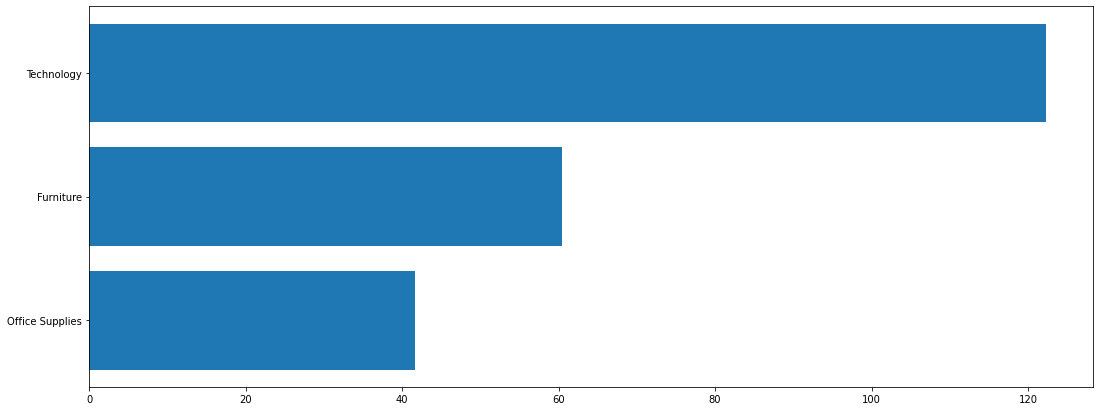

In [ ]:
cat_bar = df.pivot_table(index='category', values='profit')
cat_bar = cat_bar.reset_index()
cat_bar = cat_bar.sort_values(by='profit', ascending=True)
plt.figure(figsize=(18,7))
plt.barh(y=cat_bar['category'], width=cat_bar['profit'])
plt.show();